In [1]:
from __future__ import print_function

import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

from matplotlib import pyplot as plt

In [2]:
batch_size = 64
num_classes = 10
epochs = 12

# Get the data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_validation = x_train[:10000]
y_validation = y_train[:10000]

x_train = x_train[10000:]
y_train = y_train[10000:]

x_train = x_train.reshape(50000, 784)
x_validation = x_validation.reshape(10000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_validation = x_validation.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_validation /=255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_validation.shape[0], 'validation samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 validation samples
10000 test samples


# Convert class vectors to binary class matrices

In [4]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_validation, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Model

In [5]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [7]:
sgd = keras.optimizers.SGD(lr=0.1)

model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])

history = model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_data=(x_validation, y_validation))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/12
50000/50000 [==============================] - 14s 272us/sample - loss: 0.3802 - accuracy: 0.8868 - val_loss: 0.1830 - val_accuracy: 0.9455
Epoch 2/12
50000/50000 [==============================] - 10s 204us/sample - loss: 0.1722 - accuracy: 0.9478 - val_loss: 0.1302 - val_accuracy: 0.9599
Epoch 3/12
50000/50000 [==============================] - 9s 181us/sample - loss: 0.1239 - accuracy: 0.9623 - val_loss: 0.1083 - val_accuracy: 0.9688
Epoch 4/12
50000/50000 [==============================] - 12s 240us/sample - loss: 0.0978 - accuracy: 0.9704 - val_loss: 0.0913 - val_accuracy: 0.9731
Epoch 5/12
50000/50000 [==============================] - 11s 222us/sample - loss: 0.0808 - accuracy: 0.9763 - val_loss: 0.0831 - val_accuracy: 0.9753
Epoch 6/12
50000/50000 [==============================] - 11s 220us/sample - loss: 0.0690 - accuracy: 0.9786 - val_loss: 0.1066 - val_accuracy: 0.9661
Epoch 7/12
50000/50000 [=====================

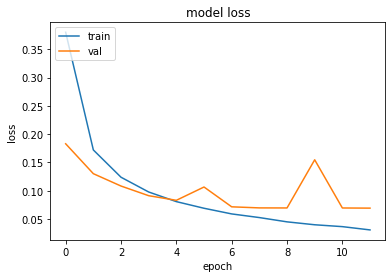

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

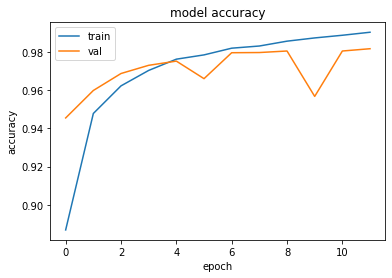

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()